# Titanic Dataset - Machine Learning Classification 

Data is downloaded from Kaggle in February 2022.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [124]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

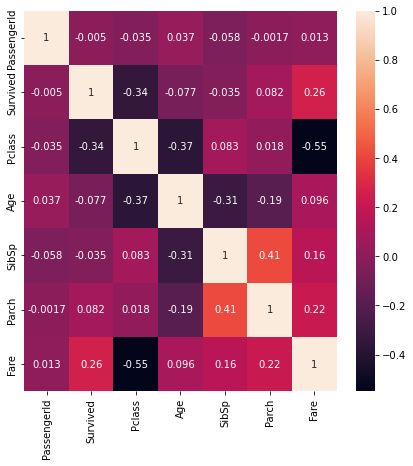

In [97]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

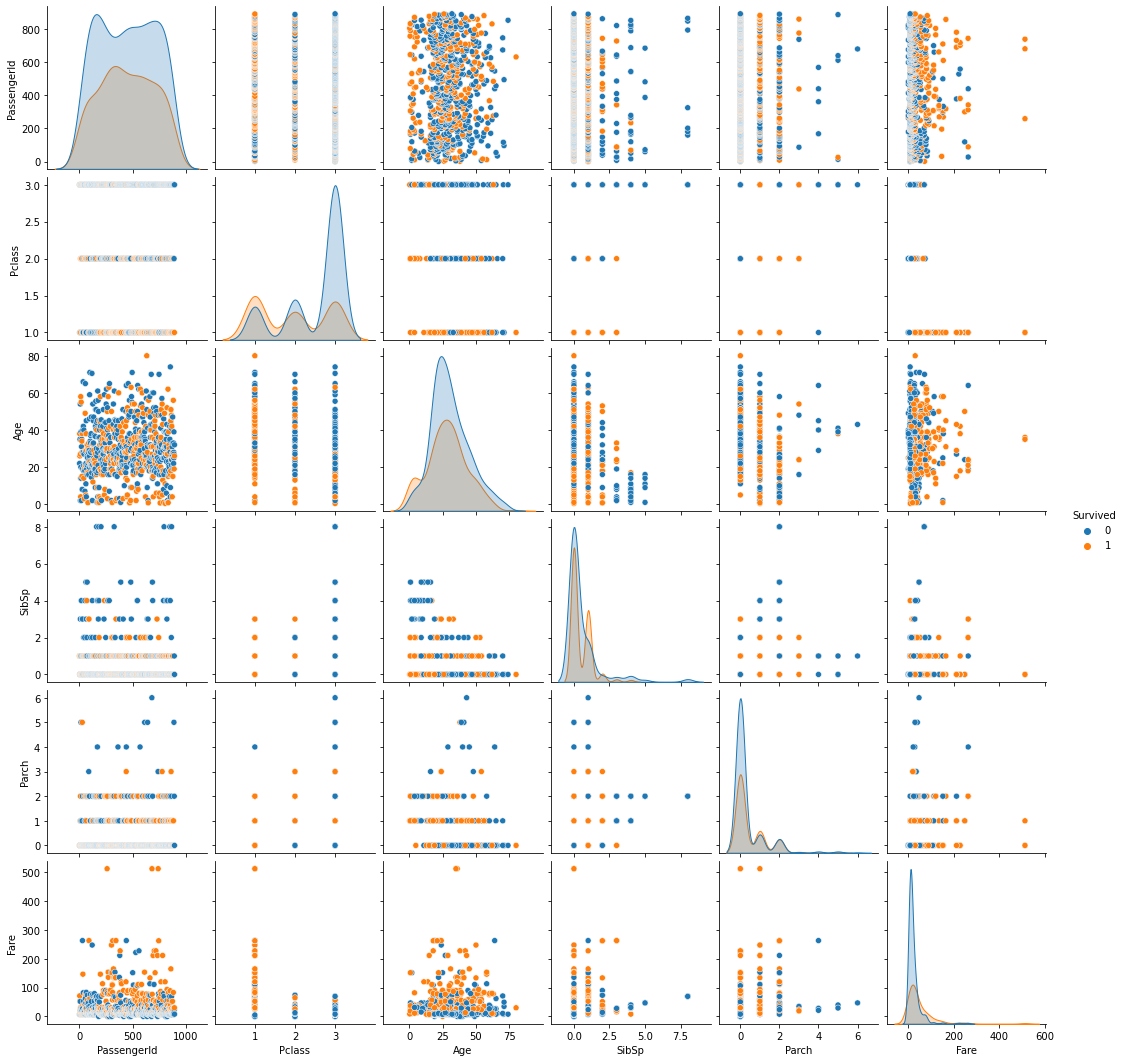

In [99]:
sns.pairplot(data, hue="Survived")

# Data Analysis

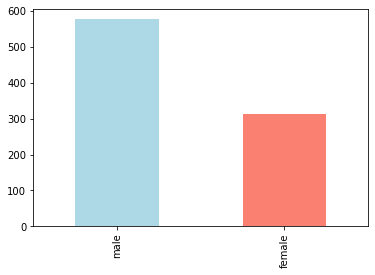

In [8]:
data["Sex"].value_counts().plot(kind="bar", color=["lightblue","salmon"])
plt.show()

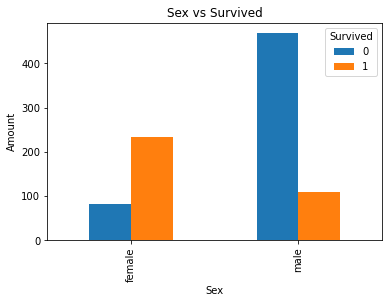

In [9]:
pd.crosstab(data.Sex, data.Survived).plot(kind="bar") #0=died, 1=survived
plt.xlabel("Sex")
plt.ylabel("Amount")
plt.title("Sex vs Survived")
plt.show()

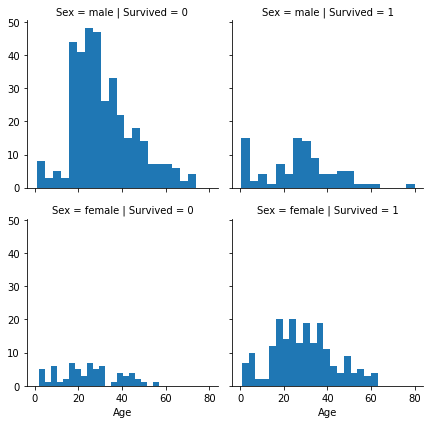

In [14]:
grid = sns.FacetGrid(data, col="Survived", row="Sex")
grid.map(plt.hist, "Age", bins=20)
grid.add_legend();

In [73]:
data[["Sex", "Survived"]].groupby(["Sex"]).mean()

,Survived
Sex,
1,0.742038
2,0.188908


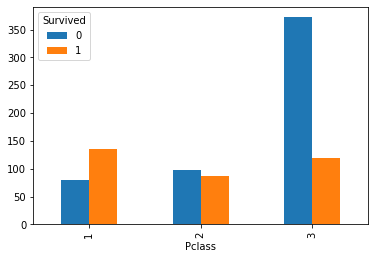

In [10]:
#Pcalss vs Survived
pd.crosstab(data.Pclass, data.Survived).plot(kind="bar");

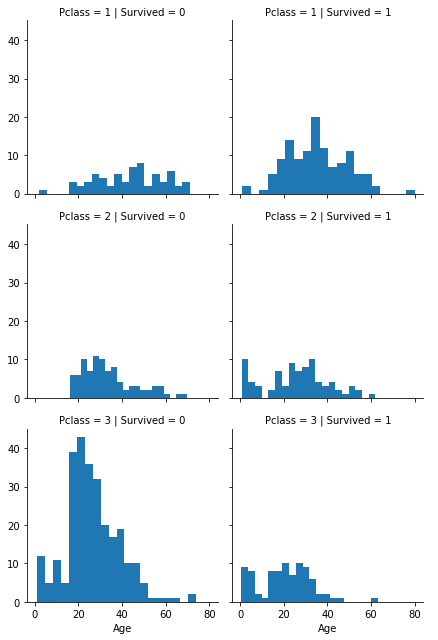

In [13]:
grid = sns.FacetGrid(data, col="Survived", row="Pclass")
grid.map(plt.hist, "Age", bins=20)
grid.add_legend();

In [72]:
data[["Pclass", "Survived"]].groupby(["Pclass"]).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


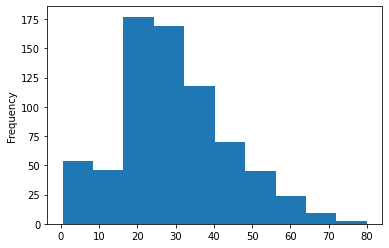

In [11]:
data.Age.plot.hist();

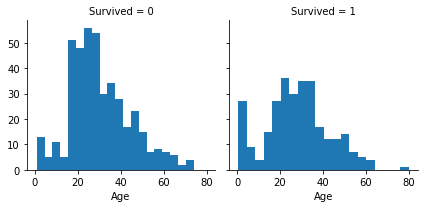

In [12]:
graph1 = sns.FacetGrid(data, col="Survived")
graph1.map(plt.hist, "Age", bins=20);

In [77]:
data[["Age", "Survived"]].groupby(["Age"]).mean()

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


In [17]:
data[["SibSp", "Survived"]].groupby(["SibSp"]).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [18]:
data[["Parch", "Survived"]].groupby(["Parch"]).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


# Handling Missing Values

In [19]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There're several approaches for dealing with missing data, some of them are:

1. Replace the missing values with the mean(for well distributed data) or median(in case there're a lot of outliers) in this case you could fill empty age columns with the median/mean of this column (This is the simplest one, maybe the most common).

2. Fill the missing data with random generated values, e.g. values between the (mean - std) and (mean + std).

3. There're some other advanced techniques which tries to predict the missing data based on the values of other variables.

As a final contribution, for Cabin as there're a lot of missing values this variable won't give us good model independently of the technique you use.

In [20]:
data.isna().sum()/len(data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

77% of Cabin is lost so delete this column. However age is an important factor so we will not delete it.

In [125]:
data.drop("Cabin", axis=1, inplace=True)

In [126]:
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
data["Fare_is_missing"] = False #to make it equal with test data

In [23]:
data.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
Fare_is_missing    0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              891 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Embarked         891 non-null    object 
 11  Fare_is_missing  891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 77.6+ KB


## Turn Strings into "Category" Type

In [25]:
pd.api.types.is_string_dtype(data["Name"])

True

In [26]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Embarked


In [127]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Name             891 non-null    category
 4   Sex              891 non-null    category
 5   Age              891 non-null    float64 
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    category
 9   Fare             891 non-null    float64 
 10  Embarked         891 non-null    category
 11  Fare_is_missing  891 non-null    bool    
dtypes: bool(1), category(4), float64(2), int64(5)
memory usage: 115.9 KB


In [128]:
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label + "_is_missing"] = pd.isnull(content)
        data[label] = pd.Categorical(content).codes +1

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Name                 891 non-null    int16  
 4   Sex                  891 non-null    int8   
 5   Age                  891 non-null    float64
 6   SibSp                891 non-null    int64  
 7   Parch                891 non-null    int64  
 8   Ticket               891 non-null    int16  
 9   Fare                 891 non-null    float64
 10  Embarked             891 non-null    int8   
 11  Fare_is_missing      891 non-null    bool   
 12  Name_is_missing      891 non-null    bool   
 13  Sex_is_missing       891 non-null    bool   
 14  Ticket_is_missing    891 non-null    bool   
 15  Embarked_is_missing  891 non-null    boo

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_is_missing,Name_is_missing,Sex_is_missing,Ticket_is_missing,Embarked_is_missing
0,1,0,3,109,2,22.0,1,0,524,7.2500,3,False,False,False,False,False
1,2,1,1,191,1,38.0,1,0,597,71.2833,1,False,False,False,False,False
2,3,1,3,354,1,26.0,0,0,670,7.9250,3,False,False,False,False,False
3,4,1,1,273,1,35.0,1,0,50,53.1000,3,False,False,False,False,False
4,5,0,3,16,2,35.0,0,0,473,8.0500,3,False,False,False,False,False


## Preparing Test Data

In [129]:
test = pd.read_csv("test.csv")

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Turn Strings into Category DType

In [34]:
for label, content in test.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [130]:
for label, content in test.items():
    if pd.api.types.is_string_dtype(content):
        test[label] = content.astype("category").cat.as_ordered()

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    category
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    category
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     category
 10  Embarked     418 non-null    category
dtypes: category(5), float64(2), int64(4)
memory usage: 55.8 KB


### Now turn these categories into numbers

In [131]:
for label, content in test.items():
    if not pd.api.types.is_numeric_dtype(content):
        test[label + "_is_missing"] = pd.isnull(content)
        test[label] = pd.Categorical(content).codes +1

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Name                 418 non-null    int16  
 3   Sex                  418 non-null    int8   
 4   Age                  332 non-null    float64
 5   SibSp                418 non-null    int64  
 6   Parch                418 non-null    int64  
 7   Ticket               418 non-null    int16  
 8   Fare                 417 non-null    float64
 9   Cabin                418 non-null    int8   
 10  Embarked             418 non-null    int8   
 11  Name_is_missing      418 non-null    bool   
 12  Sex_is_missing       418 non-null    bool   
 13  Ticket_is_missing    418 non-null    bool   
 14  Cabin_is_missing     418 non-null    bool   
 15  Embarked_is_missing  418 non-null    boo

In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,892,3,207,2,34.5,0,0,153,7.8292,0,2,False,False,False,True,False
1,893,3,404,1,47.0,1,0,222,7.0000,0,3,False,False,False,True,False
2,894,2,270,2,62.0,0,0,74,9.6875,0,2,False,False,False,True,False
3,895,3,409,2,27.0,0,0,148,8.6625,0,3,False,False,False,True,False
4,896,3,179,1,22.0,1,1,139,12.2875,0,3,False,False,False,True,False


## Now Fill Missing Values

In [40]:
test.isna().sum()

PassengerId             0
Pclass                  0
Name                    0
Sex                     0
Age                    86
SibSp                   0
Parch                   0
Ticket                  0
Fare                    1
Cabin                   0
Embarked                0
Name_is_missing         0
Sex_is_missing          0
Ticket_is_missing       0
Cabin_is_missing        0
Embarked_is_missing     0
dtype: int64

In [132]:
test.drop("Cabin", axis=1, inplace=True)
test["Age"].fillna(test["Age"].median(), inplace=True)
test["Fare"].fillna(test["Fare"].median(), inplace=True)
test["Embarked_is_missing"] = False

In [42]:
test.isna().sum()

PassengerId            0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Embarked               0
Name_is_missing        0
Sex_is_missing         0
Ticket_is_missing      0
Cabin_is_missing       0
Embarked_is_missing    0
dtype: int64

In [133]:
test.drop("Cabin_is_missing", axis=1, inplace=True)

In [44]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Name_is_missing', 'Sex_is_missing',
       'Ticket_is_missing', 'Embarked_is_missing'],
      dtype='object')

In [45]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Fare_is_missing',
       'Name_is_missing', 'Sex_is_missing', 'Ticket_is_missing',
       'Embarked_is_missing'],
      dtype='object')

In [46]:
test["Fare_is_missing"] = False

### Is there any difference between train data and test data?

In [47]:
len(data.columns)

16

In [48]:
len(test.columns)

15

In [49]:
set(data.columns) - set(test.columns)

{'Survived'}

In [50]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Name_is_missing', 'Sex_is_missing',
       'Ticket_is_missing', 'Embarked_is_missing', 'Fare_is_missing'],
      dtype='object')

In [51]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Fare_is_missing',
       'Name_is_missing', 'Sex_is_missing', 'Ticket_is_missing',
       'Embarked_is_missing'],
      dtype='object')

In [136]:
X_train = data.drop("Survived", axis=1)
y_train = data["Survived"]

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

models = {"Logistic Reg":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest Classifier":RandomForestClassifier(),
          "LinearSVC":LinearSVC(),
          "SVC":SVC()}

predictions = {}
train_scores = {}

In [55]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(test)
    train_scores[model_name] = model.score(X_train, y_train)

C:\Users\90530\Desktop\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\90530\Desktop\ML\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [56]:
predictions

{'Logistic Reg': array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 0,

In [57]:
train_scores

{'Logistic Reg': 0.7901234567901234,
 'KNN': 0.7429854096520763,
 'Random Forest Classifier': 1.0,
 'LinearSVC': 0.696969696969697,
 'SVC': 0.675645342312009}

>The best model is obviously RandomForestClassifier with 100% in training.

# Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score

#Random Forest cross_val_score:
rf_cross_val_score = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5)

#Logistic Regression cross_val_score:
lr_cross_val_score = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)

C:\Users\90530\Desktop\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\90530\Desktop\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [59]:
np.mean(rf_cross_val_score)

0.8216056744711568

In [60]:
np.mean(lr_cross_val_score)

0.7487100621429916

>However if the one adopts `cross_val_score`, the accuracy drops due to using all of the data by seperating into 5 folds. And `cross_val_score` is much more reliable and accurate. 82% in RandomForestClassifier.

# HyperParameter Tuning

In [68]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators" : np.arange(10, 1500, 50), 
           "max_depth" : [None, 3, 5, 10],
           "max_features" : ['auto', 'sqrt'],
           "min_samples_split" : np.arange(2, 10, 20),
           "min_samples_leaf" : np.arange(1, 20, 2)}
rs_rf = RandomizedSearchCV(estimator = RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv= 5,
                           n_iter = 20)

rs_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2]),
                                        'n_estimators': array([  10,   60,  110,  160,  210,  260,  310,  360,  410,  460,  510,
        560,  610,  660,  710,  760,  810,  860,  910,  960, 1010, 1060,
       1110, 1160, 1210, 1260, 1310, 1360, 1410, 1460])})

In [69]:
rs_rf_cross_val_score = cross_val_score(rs_rf, X_train, y_train, cv=5)

In [71]:
rs_rf_cross_val_score

array([0.81005587, 0.81460674, 0.85393258, 0.85955056, 0.85393258])

In [78]:
np.mean(rs_rf_cross_val_score)

0.83841566756638

In [81]:
(np.mean(rs_rf_cross_val_score)-np.mean(rf_cross_val_score))*100/(np.mean(rf_cross_val_score))

2.045992818397125

>The model has improved by 2.045%. This ratio might be important depending on the project.

In [107]:
rs_rf.best_params_

{'n_estimators': 960,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

In [112]:
rs_rf_best = RandomForestClassifier(n_estimators= 960,
                                    min_samples_split= 2,
                                    min_samples_leaf= 1,
                                    max_features="auto",
                                    max_depth= None)

In [115]:
rs_rf_best.fit(X_train, y_train)

RandomForestClassifier(n_estimators=960)

# Feature Importances

In [116]:
print(rs_rf_best.feature_importances_)

[0.1149174  0.06510457 0.1186248  0.22468424 0.11283787 0.03231867
 0.0269145  0.14449362 0.1360347  0.02406961 0.         0.
 0.         0.         0.        ]


In [147]:
#Plot Feature Importances
def plot_feat_imp(importance, features):
    feat_imp = np.array(importance)
    features = np.array(features)
    
    #Features and their importances
    data = {"feature names":features,"feature importances":feat_imp}
    
    #Create dataframe
    df = pd.DataFrame(data)
    
    #Sort the dataframe by importances
    df.sort_values(by=["feature importances"], ascending=False)
    
    #Plot
    plt.figure(figsize=(7,7))
    sns.barplot(x=df["feature importances"], y=df["feature names"])
    plt.title("Feature Importances")
    plt.xlabel("Feature Names")
    plt.ylabel("Feature Importances")

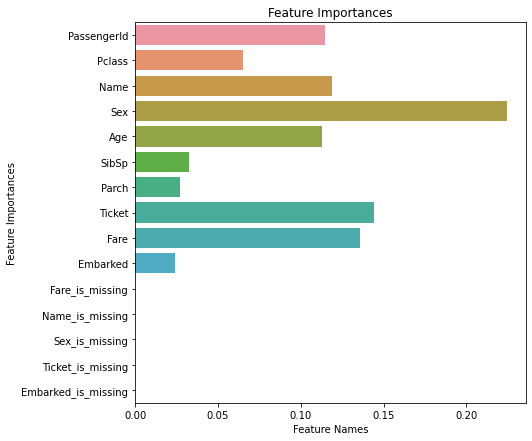

In [148]:
plot_feat_imp(rs_rf_best.feature_importances_, X_train.columns)
#len(data.columns), len(rs_rf_best.feature_importances_)